# 14. 폐렴아 기다려라!

## 1. 들어가며

<img src="./image/medical.png" alt="medical" />

딥러닝 기술이 산업적으로 명확한 용도를 입증한 도메인 중 하나로 의료 분야를 들 수 있다. 의료영상을 분석하는 일은 전문적인 훈련을 받은 숙련된 의료인력만 가능한 일이지만, 최근의 발달된 딥러닝 기술은 숙련자 수준 이상의 정확도를 바탕으로 영상분석 인력의 개인적 편차 ,주관적 판단, 피로에 의한 오진 등의 부정확성을 극복할 수 있는 좋은 대안으로 인정받고 있다.

하지만, 의료영상을 분석하는 것은 일반적인 이미지 처리와는 다소 다른 독특한 특징이 있다.

* 의료영상 이미지는 개인정보 보호 등의 이슈로 인해 데이터를 구하는 것이 쉽지 않다.
* 라벨링 작업 자체가 전문적 지식을 요하므로 데이터셋 구축 비용이 비싸다.
* 희귀질병을 다루는 경우 데이터를 입수하는 것 자체가 드문 일이다.
* 음성/양성 데이터간 imbalance가 심합니다. 학습에 주의가 필요하다.
* 이미지만으로 진단이 쉽지 않아 다른 데이터와 결합해서 해석해야 할 수도 있다.

따라서 의료영상 처리를 위해서는 딥러닝 영상처리 기술 뿐 아니라, 의료 도메인 지식 및 의료영상에 대한 명확한 이해가 아울러 필요하다.

### 목차
---
1. 의료영상에 대해
2. X-RAY 이미지
3. 폐렴을 진단해보자!
4. 직접 해보는 폐렴진단

## 2. 의료영상에 대해

### 사람 속을 보는 방법
---
폐의 문제를 진단하려면 어떻게 해야 할까? X-RAY(엑스레이) 영상을 찍거나 CT 영상을 찍어서 보면 될 것이다.

<img src="./image/chest.png" alt="chest" />

위의 사진과 같이 폐의 정상 여부 혹은 모양을 보려고 X-RAY, CT를 찍는다. 이렇게 우리는 이제 피부에 칼을 대지 않아도 우리의 몸속을 볼 수 있게 되었다. 이런 기술은 평균수명을 향상시키는 데 크게 이바지하고 있다.

### 의료 영상 종류
---

#### X-RAY
* X-RAY는 전자를 물체에 충돌시킬 때 발생하는 투과력이 강한 복사선(전자기파)을 말한다. X-RAY는 방사선의 일종으로 지방, 근육, 천, 종이 같이 밀도가 낮은 것은 수월하게 통과하지만, 밀도가 높은 뼈, 금속 같은 물질은 잘 통과하지 못한다.

<img src="./image/xray.png" alt="x-ray" />


#### CT
* CT는 Computed Tomography의 줄임말로, 환자를 중심으로 X-RAY를 빠르게 회전하여 3D 이미지를 만들어내는 영상이다. 환자의 3 차원 이미지를 형성하여 기본 구조는 물론 가능한 종양 또는 이상을 쉽게 식별하고 위치를 파악할 수 있다.
* 신체의 단면 이미지를 "Slice"라고 한다. 이러한 Slice는 단층 촬영 이미지라고도 하며 기존의 X-RAY보다 더 자세한 정보를 포함한다.

<img src="./image/ct1.png" alt="CT" />
<img src="./image/ct2.png" alt="CT" />

#### MRI
* MRI는 Magnetic Resonance Imaging(자기 공명 영상)의 줄임말로 신체의 해부학적 과정과 생리적 과정을 보기 위해 사용하는 의료 영상 기술이다. MRI 스캐너는 강한 자기장를 사용하여 신체 기관의 이미지를 생성한다. MRI는 CT, X-RAY와 다르게 방사선을 사용하지 않아서 방사선의 위험성에서는 보다 안전하다.

더 자세한 설명은 아래의 Youtube 영상을 참고

[![YTN](http://img.youtube.com/vi/J_Owz3YBkD0/0.jpg)](https://youtu.be/J_Owz3YBkD0) 

## 3. X-RAY 이미지
이제 X-RAY에 대해서 자세히 알아보자. 지금 다루게 될 X-RAY 이미지를 기반으로 하는 폐렴 진단 딥러닝 모델을 제작해 보게 될 것이다.

X-RAY 이미지를 이해하려면, X-RAY 영상을 촬영하기 위해 사용되는 자세 분류 체계를 이해하는 것이 중요하다.

### 의료영상 자세 분류
---
<img src="./image/anatomical.png" alt="Anatomical" />

위의 이미지에 따르면 의료 영상 촬영은 인체를 세 방향의 단면으로 나누어 진행된다.

* __Sagittal plane__ : 시상면. 사람을 왼쪽과 오른쪽을 나누는 면.

* __Coronal plane__ : 관상면. 인체를 앞 뒤로 나누는 면.

* __Transverse plane__ : 횡단면(수평면). 인체를 상하로 나누는 면.

예시 사진을 보자.

<img src="./image/chest2.png" alt="Anatomical chest" />

위 이미지는 흉부 부분이며 폐와 갈비뼈가 보이는 것을 육안으로 확인 가능하다.

위 이미지는 위에서 언급된 3가지 단면 중 어느 방향의 이미지에 해당할까?

바로 관상면(Coronal plane)이다. 이번에 사용할 데이터는 모두 관상면 이미지로 되어 있다.

<img src="./image/anatomical2.png" alt="Anatomical" />

영상을 볼 때의 해부학적 위치에 대해서 알아보자. 우리가 영상을 보게 되면 위의 이미지와 같이 보게 된다.<br>
처음에 많이 헷갈리는게 오른쪽과 왼쪽에 대해서 이다.<br>
우리가 영상을 볼 때는 보통 정면을 보고 있는 것으로 가정을 하며 위의 이미지에서 오른쪽에 해당한다.

오른쪽 이미지에서 왼쪽 얼굴을 한 번 보자. 일반적으로 보기에 왼쪽에 있는 얼굴을 보는데, '오른쪽'(Right) 글씨가 써져 있는 것을 볼 수 있다.<br>
그러나, 의학쪽에선 실제 사람의 왼쪽 얼굴을 보셔야 한다. 이미지에서 왼쪽 이라고 써져 있는 부분의 얼굴을 보시는게 맞을 것이다. 처음엔 헷갈릴 수 있다.



### X-RAY 특성
---
X-RAY는 전자기파가 몸을 통과한 결과를 이미지화 시킨 것이다. 즉, 통과하고 남은 전자기파의 결과이기 때문에 색상이 아니라 흑백 명암으로 나오게 된다.

X-RAY는 부위에 따라서 명암이 다르게 나온다.

<img src="./image/xray.png" alt="x-ray" />

위의 사진은 손을 찍은 사진이다.

* 뼈 : 하얀색

* 근육 및 지방 : 연한 회색

* 공기 : 검은색

<img src="./image/xray2.png" alt="x-ray" />

흉부 쪽의 영상을 보자.

* 갈비뼈 : 하얀색
* 폐 : 검은색
* 어깨 쪽의 지방 및 근육 : 연한 회색

폐는 공기가 많이 차 있기 때문에 저렇게 검은색으로 나오게된다. 위에서 본 손 사진도 공기중은 검게 나온 것을 볼 수 있다. 같은 원리인 것이다.

## 4. 폐렴을 진단해보자(1)
의료 인공지능은 다양한 분야에서 사용된다. 질병의 정확한 분류 또는 환자의 중증도를 확인하는 용도 등 다양한 용도로 사용된다.

이중에서 현재 가장 핫한 분야는 질병을 탐지해내는 인공지능이다. 이제 의사처럼 질병을 찾아내는 딥러닝 모델을 만들어보려고 한다.

### 데이터셋
---
이번에 사용할 데이터는 __캐글의 Chest X-Ray Images__ 이다.<br>
폴더를 생성하고 캐글에서 데이터를 다운받자.

[Chest X-Ray Images (Pneumonia)](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)

```bash
$ mkdir -p ~/aiffel/chest_xray
$ cd ~/Downloads && unzip archive.zip -d ~/aiffel
```

위와 같이 압축을 풀고 나면, 데이터의 구성은 ~/aiffel/chest_xray 하위에 3개의 폴더 (train, test, val)로 구성되며, 각 이미지 카테고리 (폐렴 / 정상)에 대한 하위 폴더를 포함한다. 5,856 개의 X-Ray 이미지 (JPEG)와 2 개의 범주 (폐렴 / 정상)가 있습니다. 전체 데이터의 크기는 총 1.2GB 가량 된다.

해당 이미지는 중국 광저우에 있는 광저우 여성 및 어린이 병원의 1~5 세 소아 환자의 흉부 X 선 영상이다. 

### 폐렴이란?
---
데이터를 직접 분석하기 전에 `폐렴`에 대해서 알아야한다. 폐렴은 무엇일까?

> _폐렴(pneumonia 뉴모니아)은 폐에 염증이 생긴 상태로 중증의 호흡기 감염병이다. 세균을 통한 감염이 가장 많으며, 바이러스, 균류, 또는 기타 미생물도 원인이 될 수가 있다. 드물게는 알레르기 반응이나 자극적인 화학 물질을 흡입해 발생하기도 한다. 노인이나 어린아이, 혹은 전체적으로 상태가 안 좋은 환자들이나 기침 반사가 약한 사람들에게는 흡인성 폐렴이 발생한다. 그리고 세균이 원인인 경우는 항생제로 치료를 할 수 있다. 항생제가 생기기 전에는 50~90%가 사망할 정도로 위험한 질환이었으나, 현재는 거의 사망하지 않는다. 1940년대에 항생제가 개발되기 전까지는 폐렴 환자의 1/3 정도가 사망하였다. 오늘날에는 적절한 의학적 치료로 폐렴 환자의 95% 이상이 회복된다. 그러나 일부 저개발국(개발 도상국)에서는 폐렴이 여전히 주요 사망 원인 중 하나이다.<br><br>
출처 : [https://ko.wikipedia.org/wiki/폐렴](https://ko.wikipedia.org/wiki/폐렴)_

폐렴은 쉽게 말해 폐에 염증이 생기는 것이다. 그럼 염증은 정확히 무엇일까?

> _염증은 유해한 자극에 대한 생체반응 중 하나로 면역세포, 혈관, 염증 매개체들이 관여하는 보호반응이다. 염증의 목적은 세포의 손상을 초기 단계에서 억제하고, 상처부분의 파괴된 조직 및 괴사된 세포를 제거하며, 동시에 조직을 재생하는 것이다.<br><br>
출처 : [https://ko.wikipedia.org/wiki/염증](https://ko.wikipedia.org/wiki/염증)_

염증은 쉽게 말해 우리 몸을 지키기 위해 백혈구들이 싸우고 있는 장소라고 할 수 있다. 폐렴이라면 폐에서 바이러스나 세균으로부터 우리 몸을 지키기 위해 백혈구들이 싸우고 있는 상황이라고 생각하시면 될 것같다.

그럼 폐렴이 걸렸을 때 X-RAY 상에서 어떻게 나오는지 보자.

### 폐렴 구별법
---
<img src="./image/pneumonia.png" alt="pneumonia" />

폐렴의 구별법은 언뜻 예상 외로 간단하다.<br>
X-RAY 사진상, 다양한 양상의 음영(폐 부위에 희미한 그림자) 증가가 관찰된다.<br>
구별 방법은 간단하지만 실제로 영상을 보면 희미한 경우가 많이 있어 저게 실제로 폐렴으로 인한 것인지 아니면 다른 이유 때문인지 파악하기 어렵다.

<img src="./image/chest2.png" alt="Anatomical chest" />

정상적인 흉부 X-RAY(왼쪽)는 이미지에서 비정상적인 음영 영역이 없는 깨끗한 폐를 보여준다.<br>
세균성 폐렴 (가운데)은 일반적으로 오른쪽 상부 엽 (흰색 화살표)에 있는 나타내는 반면, 바이러스성 폐렴 (오른쪽)은 양쪽 폐에서보다 확산 된 "interstitial(조직 사이에 있는)" 패턴으로 나타난다.

위와 같이 폐렴에 걸린 사진들은 특징이 패턴을 이루고 있는 것을 볼 수 있다.<br>
이런 패턴을 잘 읽어내는 딥러닝 알고리즘은 충분히 학습 시킬 수 있을 것 같다.<br>
딥러닝 알고리즘들이 패턴인식 알고리즘의 일종이라고 부르는 것처럼,<br>
이 이미지에서 폐렴의 특징 패턴을 학습해서 찾아내게 시키면 된다.

그럼 이제 폐렴인지 아닌지에 대해 진단을 내릴 수 있는 딥러닝 모델을 만들어보자.

(참고) 아래 코드는 이 [캐글 노트북](https://www.kaggle.com/amyjang/tensorflow-pneumonia-classification-on-x-rays)을 기반으로 작성된 것임을 밝힌다.

### Set-up
---
가장 먼저, 패키지(라이브러리)들을 import 하자.

이번 프로젝트에서 사용할 패키지 목록이다.

In [1]:
import re    # 정규표현식 관련된 작업에 필요한 패키지
import os    # I/O 관련된 작업에 필요한 패키지 
import pandas as pd     # 데이터 전처리 관련된 작업에 필요한 패키지
import numpy as np      # 데이터 array 작업에 필요한 패키지
import tensorflow as tf  # 딥러닝 관련된 작업에 필요한 패키지
import matplotlib.pyplot as plt    # 데이터 시각화에 관련된 작업에 필요한 패키지
from sklearn.model_selection import train_test_split  # 데이터 전처리에 필요한 패키지

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


앞으로 필요한 변수들을 생성한다.

In [3]:
# 데이터 로드할 때 빠르게 로드할 수 있도록하는 설정 변수
AUTOTUNE = tf.data.experimental.AUTOTUNE

# 데이터 ROOT 경로 변수
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel')

# BATCH_SIZE 변수
BATCH_SIZE = 16

# X-RAY 이미지 사이즈 변수
IMAGE_SIZE = [180, 180]

# EPOCH 크기 변수
EPOCHS = 25

print(ROOT_PATH)

/home/aiffel-dj10/aiffel


### 데이터 가져오기
---
import를 했으니 데이터를 가져와 보자. 데이터를 열어보면 이미 train, val(validation), test 로 나뉘어져 있다. 각 데이터들의 갯수를 한번 체크하자.

In [4]:
train_filenames = tf.io.gfile.glob(str(ROOT_PATH + '/chest_xray/chest_xray/train/*/*'))
test_filenames = tf.io.gfile.glob(str(ROOT_PATH + '/chest_xray/chest_xray/test/*/*'))
val_filenames = tf.io.gfile.glob(str(ROOT_PATH + '/chest_xray/chest_xray/val/*/*'))

print(len(train_filenames))
print(len(test_filenames))
print(len(val_filenames))

5216
624
16


train 안에는 5216개, test 안에는 624개, val 안에는 16개가 있다.

갯수 비는 89%, 10.7%, 0.3% 이다. val 갯수가 너무 없기 때문에 train에서 val에 쓰일 데이터를 더 가져와보겠다.

train과 val에 있는 데이터를 모은 다음에 train : val를 80:20으로 분할하자.

In [5]:
filenames = tf.io.gfile.glob(str(ROOT_PATH + '/chest_xray/chest_xray/train/*/*'))
filenames.extend(tf.io.gfile.glob(str(ROOT_PATH + '/chest_xray/chest_xray/val/*/*')))

# train, test(val) dataset으로 분할. test_size에 0.2는 20%롤 의미함.
train_filenames, val_filenames = train_test_split(filenames, test_size=0.2)

print(len(train_filenames))
print(len(val_filenames))

4185
1047


이제 train은 4185개, test는 624개, val은 1047개가 되었다. test_size를 수정하면 갯수는 달라질 수 있다.

train 데이터 안에 정상 이미지 수와 폐렴 이미지 수를 한번 보자.

In [6]:
COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
print("Normal images count in training set: " + str(COUNT_NORMAL))

COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
print("Pneumonia images count in training set: " + str(COUNT_PNEUMONIA))

Normal images count in training set: 1097
Pneumonia images count in training set: 3088


결과를 보면 정상보다 폐렴 이미지 수가 3배 더 많이 있다. 오늘 사용할 CNN 모델의 경우 데이터가 클래스별 balance가 좋을 수록 training을 잘 한다. 데이터가 클래스 불균형(imbalance)한 것은 차후에 조정할 예정이다. test와 val 데이터셋은 평가하기 위해서 사용되기 때문에 학습과 관련이 없으므로 imbalance한 데이터 셋이어도 문제 없다.

tf.data 인스턴스를 만들어보자. tf.data는 tensorflow에서 학습시킬 때, 배치처리 작업을 보다 효율적으로 할 수 있도록 해준다.

In [7]:
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)

Train 데이터 셋, validation 데이터 셋 갯수 확인을 해보자.

In [8]:
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print("Training images count: " + str(TRAIN_IMG_COUNT))

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print("Validating images count: " + str(VAL_IMG_COUNT))

Training images count: 4185
Validating images count: 1047


라벨 이름들을 한번 확인해보자.

In [9]:
CLASS_NAMES = np.array([str(tf.strings.split(item, os.path.sep)[-1].numpy())[2:-1]
                        for item in tf.io.gfile.glob(str(ROOT_PATH + "/chest_xray/chest_xray/train/*"))])
print(CLASS_NAMES)

['NORMAL' 'PNEUMONIA']


두 개의 라벨이 있다. 정상을 의미하는 'NORMAL', 폐렴을 의미하는 'PNEUMONIA' 가 있다.

현재 이미지에는 라벨 데이터가 따로 없다. 제목에 'NORMAL', 'PNEUMONIA'라고 되어 있기 때문에 이를 이용해서 라벨 데이터를 만들어 주는 함수를 만들어야한다.

In [10]:
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"   # 폐렴이면 양성(True), 노말이면 음성(False)를 리턴하게 합니다.

이미지 데이터는 현실적으로 사이즈가 제각각일 가능성이 높다.<br>
이미지의 사이즈를 통일 시키고 GPU 메모리를 더욱 효율적으로 사용하기 위해 이미지 사이즈를 줄여보자.<br>
decode_img 함수와 process_path 함수를 만들겠다.

process_path 함수에서 decode_img 함수를 이용해서 이미지의 데이터 타입을 float으로 바꾸고 사이즈를 변경한다. get_label을 이용해서 라벨 값을 가져온다.

In [11]:
def decode_img(img):
  # 이미지를 uint8 tensor로 바꾼다.
  img = tf.image.decode_jpeg(img, channels=3)
  # img를 범위 [0,1]의 float32 데이터 타입으로 바꾼다.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # img의 이미지 사이즈를 IMAGE_SIZE에서 지정한 사이즈로 수정한다.
  return tf.image.resize(img, IMAGE_SIZE)

def process_path(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

train 데이터 셋과 validation 데이터 셋을 만든다. num_parallel_calls 파라미터에서 set-up에서 초기화 한 AUTOTUNE을 이용하면 더욱 빠르게 데이터를 처리해준다.

In [12]:
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

이미지가 잘 리사이즈 되었는지, 그리고 라벨이 잘 들어가 있는지 확인해보자.

In [13]:
for image, label in train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  True


사이즈가 잘 변환되어 있고 라벨도 잘 들어가있는 모습이다. 참고로, 코드에서 `train_ds.take(1)`은 하나의 데이터만 가져온다 라는 의미이다.

위에서 train과 validation 데이터 셋을 만든 것 처럼 test 데이터 셋도 만들어 보겠다. 그리고 데이터 갯수도 확인해보자.

In [14]:
test_list_ds = tf.data.Dataset.list_files(str(ROOT_PATH + '/chest_xray/chest_xray/test/*/*'))
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

print(TEST_IMAGE_COUNT)

624


Tensorflow에서는 tf.data 파이프라인을 사용해서 학습 데이터를 효율적으로 사용할 수 있도록 해준다.<br>
밑에 있는 prepare_for_training() 함수는 학습 데이터를 효율적으로 할 수 있도록 데이터를 변환 시켜준다.

shuffle()을 사용하며 고정 크기 버퍼를 유지하고 해당 버퍼에서 무작위로 균일하게 다음 요소를 선택한다.

repeat()를 사용하면 epoch를 진행하면서 여러번 데이터셋을 불러오게 되는데, 이때 repeat()를 사용한 데이터셋의 경우 여러번 데이터셋을 사용할 수 있게 해준다.<br>
예를 들어, 100개의 데이터를 10번 반복하면 1000개의 데이터가 필요하게 된다. repeat()를 사용하면 자동으로 데이터를 맞춰준다.

batch()를 사용하면 BATCH_SIZE에서 정한 만큼의 배치로 주어진다.<br>
예를 들어, 100개의 데이터를 10개의 배치로 나누게 되면 각 배치에는 10개의 데이터로 나뉘게 된다.

prefetch()를 사용하면 학습데이터를 나눠서 읽어오기 때문에, 첫 번째 데이터를 GPU에서 학습하는 동안 두 번째 데이터를 CPU에서 준비할 수 있어 리소스의 유휴 상태를 줄일 수 있다.

In [15]:
def prepare_for_training(ds, shuffle_buffer_size=1000):

    ds = ds.shuffle(buffer_size=shuffle_buffer_size)

    ds = ds.repeat()

    ds = ds.batch(BATCH_SIZE)

    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

### 데이터 시각화
---
데이터를 보기 위해 먼저, train에 있는 batch 중 첫 번째 배치를 추출한다. 추출된 배치를 image와 label 데이터 셋으로 나눈다. 이제 show_batch()함수를 이용해서 결과 사진을 보겠다.



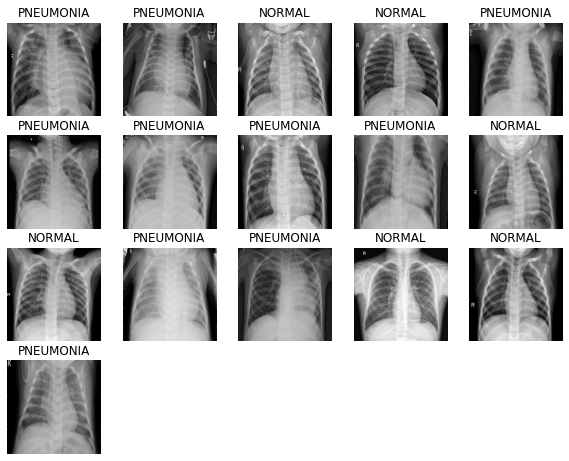

In [16]:
image_batch, label_batch = next(iter(train_ds))

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(16):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")

show_batch(image_batch.numpy(), label_batch.numpy())

## 5. 폐렴을 진단해보자(2)

### CNN 모델링
---
가장 대표적인 딥러닝 모델인 CNN을 모델링하고 결과를 만들어 보겠다.

[CNN, Convolutional Neural Network 요약](http://taewan.kim/post/cnn/)

먼저, Convolution block을 만든다. conv_block()의 구성은 Convolution을 두번 진행하고 Batch Normalization을 통해서 Gradient vanishing, Gradient Exploding을 해결한다. 그리고 Max Pooling을 한다.

In [17]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ]
    )
    
    return block

Dense Block은 아래와 같이 만든다.

In [18]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

만들 CNN 모델은 약간의 수정을 거쳐 만들어진 모델이다. 전형적인 CNN 모델과는 약간 다른 모델이다.

어떤 부분이 가장 특이한가? 눈에 띄었을지 모르겠지만, 방금 만들어진 모델에는 Batch Normalization과 Dropout이라는 두가지 regularization 기법이 동시에 사용되고 있다.<br>
일반적으로 이런 방법은 잘 사용되지 않거나, 금기시되기도 한다. 대표적으로 아래와 같은 논문의 사례를 들 수 있다.

* [Understanding the Disharmony between Dropout and Batch Normalization by Variance Shift](https://openaccess.thecvf.com/content_CVPR_2019/papers/Li_Understanding_the_Disharmony_Between_Dropout_and_Batch_Normalization_by_Variance_CVPR_2019_paper.pdf)

위 논문에서는 variance shift를 억제하는 Batch Normalization과 이를 유발시키는 Dropout을 동시에 사용하는 것이 어울리지 않는다고 밝히고 있다.

그러나, 실용적으로는 두 방법을 같이 쓰는 것이 낫다고 보는 견해도 없는 것은 아니다. 예외적으로 동시에 사용하는 것이 성능향상에 도움을 주는 경우가 실제로 있다. 아래 논문과 같이 두 방법을 같이 쓰는 것을 옹호하는 경우도 있다.

* [Rethinking the Usage of Batch Normalization and Dropout in the Training of Deep Neural Networks](https://arxiv.org/pdf/1905.05928.pdf)

두가지를 함께 사용하는 이 모델이 성능향상에 도움이 될지 여부도 흥미롭게 살펴볼만 한 부분이다.

In [19]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

### 데이터 imbalance 처리
---
위에서 얘기 했던 데이터 imbalance 문제이다.<br>
'Normal'과 폐렴에서 'Pneumonia' 중에 'Pneumonia' 데이터가 많이 있었다. 한 라벨이 너무 많은 경우를 imbalance 하다고 하는데, 데이터를 학습 할 때 imbalance한 데이터의 경우 학습 효과가 좋지 않을 수 있다.

이런 문제들을 해결하는 방법으로 `Weight balancing`이라는 테크닉이 사용된다. Weight balancing 은 training set 의 각 데이터에서 loss 를 계산할 때 특정 클래스의 데이터에 더 큰 loss 값을 갖도록 가중치를 부여하는 방법이다. Keras는 model.fit()을 호출할 때 파라미터로 넘기는 class_weight 에 이러한 클래스별 가중치를 세팅할 수 있도록 지원하고 있다. 상세한 내용은 아래 링크 참고.

* [딥러닝에서 클래스 불균형을 다루는 방법](https://3months.tistory.com/414)

아래 코드에서 `weight_for_0`은 'Normal' 이미지에 사용할 weight를, `weight_for_1`은 'Pneumonia' 이미지에 사용할 weight를 세팅한다. 이 weight들은 'Normal'과 'Pneumonia' 전체 데이터 건수에 반비례하도록 설정된다.

In [20]:
weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0 
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.91
Weight for class 1: 0.68


### 모델 훈련
---
이미지 훈련은 GPU를 사용할 것이기 때문에 먼저 GPU를 선택한다. 모델은 위에서 만들었던 모델 함수인 build_model()을 model에 선언한다.

이미지의 라벨이 두 개밖에 없기 때문에 "binary_cross entropy" loss를 사용한다. optimizer로 'adam'을 사용한다.
성과에 대해서 측정하기 위한 metrics으로 'accuracy', 'precision', 'recall'을 사용한다.



In [21]:
with tf.device('/GPU:0'):
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

모델을 fit 해보자. 각 파라미터에 위에서 선언했었던 변수, 데이터 셋을 가져와서 각각에 맞게 넣어준다.

In [22]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
    )

Epoch 1/25
261/261 [==============================] - 31s 119ms/step - loss: 0.4398 - accuracy: 0.7665 - precision: 0.9348 - recall: 0.7348 - val_loss: 0.5708 - val_accuracy: 0.7587 - val_precision: 0.7587 - val_recall: 1.0000
Epoch 2/25
261/261 [==============================] - 27s 103ms/step - loss: 0.2439 - accuracy: 0.9028 - precision: 0.9715 - recall: 0.8946 - val_loss: 0.8408 - val_accuracy: 0.7615 - val_precision: 0.7615 - val_recall: 1.0000
Epoch 3/25
261/261 [==============================] - 27s 102ms/step - loss: 0.1999 - accuracy: 0.9210 - precision: 0.9778 - recall: 0.9137 - val_loss: 0.2134 - val_accuracy: 0.9087 - val_precision: 0.8934 - val_recall: 0.9987
Epoch 4/25
261/261 [==============================] - 26s 100ms/step - loss: 0.2103 - accuracy: 0.9270 - precision: 0.9747 - recall: 0.9250 - val_loss: 0.1291 - val_accuracy: 0.9567 - val_precision: 0.9570 - val_recall: 0.9873
Epoch 5/25
261/261 [==============================] - 26s 100ms/step - loss: 0.1804 - accura

### 결과 확인
---
이제 결과를 확인해보자. 그래프로 Epochs 마다 모델의 precision, recall, accuracy, loss가 어떻게 변하는지 보여준다.

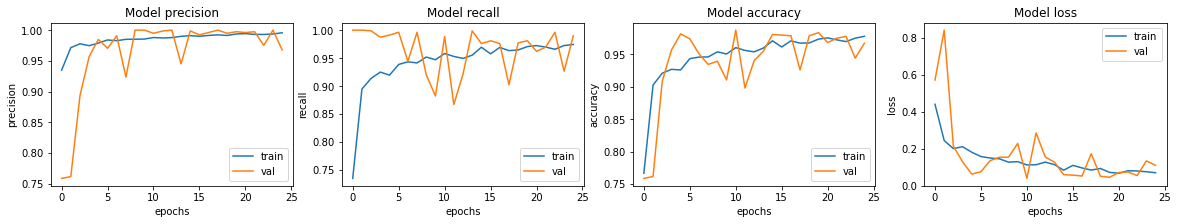

In [23]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

테스트 데이터로 모델 평가를 해보겠다.

모델 평가를 위해 loss, accuracy, precision, recall 값을 출력 해보겠다.

In [24]:
loss, acc, prec, rec = model.evaluate(test_ds)

39/39 [==============================] - 2s 63ms/step - loss: 1.5279 - accuracy: 0.7420 - precision: 0.7109 - recall: 0.9897


의사분들이 90% 이상이시니 거의 비슷한 실력이라기에는 다소 모자라는 느낌은 있지만 의료 보조 용도로는 어느정도 쓸만한 모델이라고는 할수 있겠다.

그럼 성능을 좀더 개선해볼 수 있는 방법은 없을까?<br>
오늘 다룬 폐렴 데이터를 기반으로 한 연구도 많이 찾아볼 수 있다.

의료 데이터의 경우 구하기도 어렵고 구하더라도 데이터가 작은 경우가 많이 있다. 이런 문제를 해결하기 위해 Data augmentation 방법을 많이 시도한다.<br>
Data augmentation 은 각 데이터에 최적화된 방법을 찾기가 어렵고 제약사항이 많다. 그래서 의료분야에서는 기본적인 Data augmentation 방법들을 많이 사용한다. 이미지 회전, 가우시안 노이즈 추가 방법 등을 많이 사용한다. 특히 장기의 크기는 사람마다 거의 바뀌지 않는다. 이런 특성을 이용한 방법이 노이즈 추가 방법이다.

전통적인 Data augmentation 방법 이외에도 GAN을 이용해서 Data augmentation을 시도하는 연구들도 많이 있으니 참고하면 좋을 것 같다.